Import Datasets libarys

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Load Datasets

In [2]:
train_data=pd.read_csv(r"D:\NLP_Proj\train.csv")
test_data=pd.read_csv(r"D:\NLP_Proj\test.csv")

 Data cleanning for train data and test data

In [3]:
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
test_data.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


Data Cleaning for trained Data

In [5]:
train_data.tail()

,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


In [6]:
test_data.tail()

,id,keyword,location,text
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...
3262,10875,NaN,NaN,#CityofCalgary has activated its Municipal Eme...


In [7]:
train_data.shape

(7613, 5)

In [8]:
test_data.shape

(3263, 4)

In [9]:
train_data.dtypes, test_data.dtypes

(id           int64
 keyword     object
 location    object
 text        object
 target       int64
 dtype: object,
 id           int64
 keyword     object
 location    object
 text        object
 dtype: object)

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [11]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [12]:
train_data.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [13]:
test_data.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

In [14]:
train_data.duplicated().sum()

np.int64(0)

In [15]:
test_data.duplicated().sum()

np.int64(0)

EDA(Exploratory Data Analysis) 

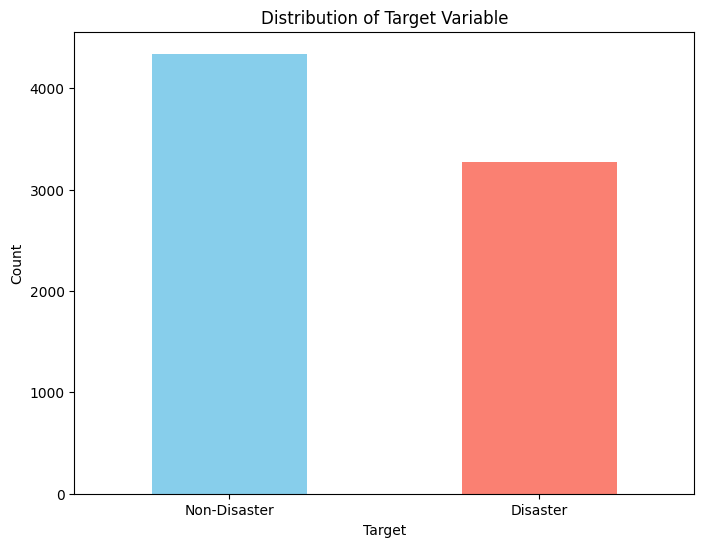

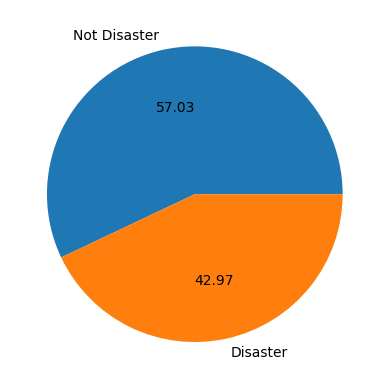

In [43]:
plt.figure(figsize=(8, 6))
train_data['target'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Non-Disaster', 'Disaster'], rotation=0)
plt.show()
plt.pie(x=train_data['target'].value_counts(),labels=['Not Disaster', 'Disaster'],autopct='%0.2f')
plt.show()

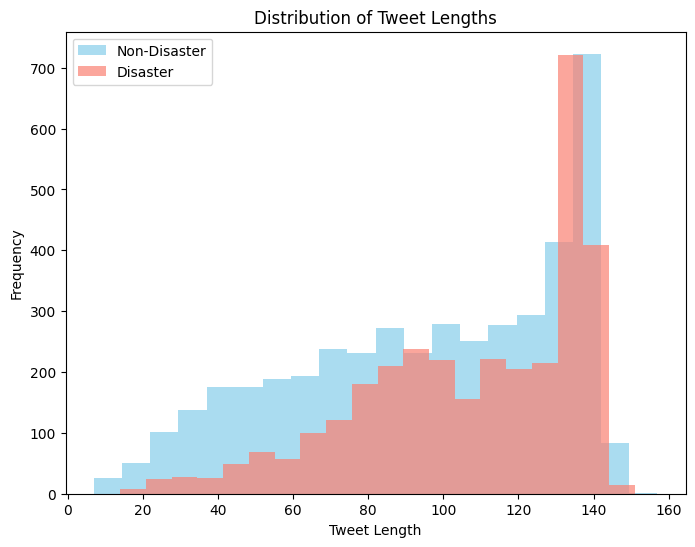

In [17]:
train_data['tweet_length'] = train_data['text'].apply(len)
plt.figure(figsize=(8, 6))
plt.hist(train_data[train_data['target'] == 0]['tweet_length'], bins=20, color='skyblue', alpha=0.7, label='Non-Disaster')
plt.hist(train_data[train_data['target'] == 1]['tweet_length'], bins=20, color='salmon', alpha=0.7, label='Disaster')
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Data Preprocessing

In [18]:
import re
import nltk

In [19]:
nltk.download('punkt_tab')

[nltk_data] Error loading punkt_tab: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [20]:
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [21]:
nltk.download('wordnet')

[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [35]:
train_data['lower']=train_data['text'].str.lower()

Removing URLS ,HTML Tags

In [48]:
def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub('', text)
def remove_urls(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub('', text)
train_data['remove_html'] = train_data['text'].apply(remove_html_tags)
train_data['remove_urls'] = train_data['text'].apply(remove_urls)
train_data['remove_html']

0       our deeds are the reason of this #earthquake m...
1                  forest fire near la ronge sask. canada
2       all residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       just got sent this photo from ruby #alaska as ...
                              ...                        
7608    two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @thetawniest the out of control w...
7610          m1.94 [01:04 utc]?5km s of volcano hawaii. 
7611    police investigating after an e-bike collided ...
7612    the latest: more homes razed by northern calif...
Name: remove_html, Length: 7613, dtype: object

In [49]:
# Removing Stopwords
from nltk.corpus import stopwords
def remove_sw(text):
    stop_words = set(stopwords.words('english'))
    new_text = [w for w in text.split() if w.lower() not in stop_words]
    return ' '.join(new_text)
train_data['remove_stop'] = train_data['text'].apply(remove_sw)
train_data['remove_stop']

0           deeds reason #earthquake may allah forgive us
1                  forest fire near la ronge sask. canada
2       residents asked 'shelter place' notified offic...
3       13,000 people receive #wildfires evacuation or...
4       got sent photo ruby #alaska smoke #wildfires p...
                              ...                        
7608    two giant cranes holding bridge collapse nearb...
7609    @aria_ahrary @thetawniest control wild fires c...
7610                m1.94 [01:04 utc]?5km volcano hawaii.
7611    police investigating e-bike collided car littl...
7612    latest: homes razed northern california wildfi...
Name: remove_stop, Length: 7613, dtype: object

In [50]:
# Stemming
from nltk.stem.porter import PorterStemmer
ste = PorterStemmer()
def stem_words(text):
    return ' '.join([ste.stem(word) for word in nltk.word_tokenize(text)])
train_data['stemmed_text'] = train_data['text'].apply(stem_words)
train_data['stemmed_text']

0       our deed are the reason of thi # earthquak may...
1                  forest fire near la rong sask . canada
2       all resid ask to 'shelter in place ' are be no...
3       13,000 peopl receiv # wildfir evacu order in c...
4       just got sent thi photo from rubi # alaska as ...
                              ...                        
7608    two giant crane hold a bridg collaps into near...
7609    @ aria_ahrari @ thetawniest the out of control...
7610      m1.94 [ 01:04 utc ] ? 5km s of volcano hawaii .
7611    polic investig after an e-bik collid with a ca...
7612    the latest : more home raze by northern califo...
Name: stemmed_text, Length: 7613, dtype: object

In [51]:
#  Lemmatization
from nltk.stem import WordNetLemmatizer
lema = WordNetLemmatizer()
def lema_words(text):
    return ' '.join([lema.lemmatize(word) for word in nltk.word_tokenize(text)])
train_data['lema_text'] = train_data['text'].apply(lema_words)
train_data['lema_text']

0       our deed are the reason of this # earthquake m...
1                 forest fire near la ronge sask . canada
2       all resident asked to 'shelter in place ' are ...
3       13,000 people receive # wildfire evacuation or...
4       just got sent this photo from ruby # alaska a ...
                              ...                        
7608    two giant crane holding a bridge collapse into...
7609    @ aria_ahrary @ thetawniest the out of control...
7610      m1.94 [ 01:04 utc ] ? 5km s of volcano hawaii .
7611    police investigating after an e-bike collided ...
7612    the latest : more home razed by northern calif...
Name: lema_text, Length: 7613, dtype: object